<a href="https://colab.research.google.com/github/sthapa5496-ops/Samraggi/blob/main/Thapa_Samraggi_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from **scratch instead of using any pre-existing libraries** to do so:

(1) Count the frequency of all the N-grams (N=3) and (N=2).

(2) Calculate the probabilities for all the bigrams in the dataset by using the formula  count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative
probabilities of each review in terms of other reviews (abstracts, or tweets) by using the formula  frequency (noun phrase) / max frequency (noun phrase) on the whole dataset.

Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [1]:

from google.colab import drive
import pandas as pd
import re
from collections import defaultdict

drive.mount('/content/drive')

data_path = '/content/drive/MyDrive/papers_10000_cleaned.csv'
raw_df = pd.read_csv(data_path)

possible_text_cols = ["text", "clean_text", "abstract", "review"]
target_col = next((c for c in raw_df.columns if c.lower() in possible_text_cols), None)

if not target_col:
    raise ValueError(f"No valid text column found in {raw_df.columns.tolist()}")

corpus_texts = raw_df[target_col].dropna().astype(str).tolist()
print(f"✅ Loaded {len(corpus_texts)} records from '{target_col}'")


def clean_and_split(text_line):
    text_line = re.sub(r"[^a-zA-Z0-9\s]", "", text_line.lower())
    return text_line.split()


def make_ngrams(word_list, n):
    return [tuple(word_list[i:i+n]) for i in range(len(word_list)-n+1)]


uni_freq = defaultdict(int)
bi_freq = defaultdict(int)
tri_freq = defaultdict(int)

for doc_text in corpus_texts:
    words = clean_and_split(doc_text)
    for w in words:
        uni_freq[w] += 1
    for bg in make_ngrams(words, 2):
        bi_freq[bg] += 1
    for tg in make_ngrams(words, 3):
        tri_freq[tg] += 1


bi_prob = {}
for (first, second), count in bi_freq.items():
    if uni_freq[first] > 0:
        bi_prob[(first, second)] = count / uni_freq[first]


bi_df = pd.DataFrame([
    {"Bigram": f"{a} {b}", "Count": c, "Probability": round(bi_prob.get((a, b), 0), 4)}
    for (a, b), c in bi_freq.items()
])
tri_df = pd.DataFrame([
    {"Trigram": " ".join(t), "Count": c}
    for t, c in tri_freq.items()
])

bi_df.sort_values(by="Count", ascending=False, inplace=True)
tri_df.sort_values(by="Count", ascending=False, inplace=True)

print("\n=== 🧩 Top 10 Bigrams ===")
display(bi_df.head(10))

print("\n=== 🧩 Top 10 Trigrams ===")
display(tri_df.head(10))

def grab_noun_phrases(sentence):

    return re.findall(r"\b([A-Z][a-z]+(?:\s+[A-Z][a-z]+){0,2})\b", sentence)

phrase_freq = defaultdict(int)
for doc in corpus_texts:
    phrases = grab_noun_phrases(doc)
    for phrase in phrases:
        phrase_freq[phrase.lower()] += 1


max_phrase_count = max(phrase_freq.values()) if phrase_freq else 1
rows = []

for idx, doc_text in enumerate(corpus_texts):
    found_phrases = grab_noun_phrases(doc_text)
    row_entry = {"Record": f"Doc {idx+1}"}
    for np in phrase_freq:
        row_entry[np] = found_phrases.count(np.title()) / max_phrase_count
    rows.append(row_entry)

if rows:
    phrase_table = pd.DataFrame(rows).set_index("Record")
    phrase_table.fillna(0, inplace=True)
else:
    phrase_table = pd.DataFrame()

print("\n=== 🧠 Noun Phrase Probability Table (first 10 documents) ===")
if not phrase_table.empty:
    display(phrase_table.head(10))
else:
    print("⚠️ No noun phrases detected — check if your text includes capitalized terms (e.g., 'Artificial Intelligence').")


Mounted at /content/drive
✅ Loaded 4561 records from 'Abstract'

=== 🧩 Top 10 Bigrams ===


,Bigram,Count,Probability
52,machine learning,10635,0.9150
331,of the,4049,0.1468
407,in the,2636,0.1576
343,in this,2086,0.1247
510,of machine,1847,0.0670
312,deep learning,1635,0.6296
117,such as,1620,0.6345
98,can be,1490,0.4137
203,this paper,1423,0.1998
1746,to the,1384,0.0750



=== 🧩 Top 10 Trigrams ===


,Trigram,Count
542,of machine learning,1807
487,machine learning models,899
53,machine learning algorithms,814
773,in this paper,773
1044,as well as,724
1781,in machine learning,663
322,machine learning and,657
774,this paper we,655
994,machine learning techniques,556
948,machine learning methods,480



=== 🧠 Noun Phrase Probability Table (first 10 documents) ===


,we,fashion,the,this,google,apache,november,with,more,in,...,central,laplacian,frobenius,coordinate,like,compounds,morgan,infer,if tool,the what
Record,,,,,,,,,,,,,,,,,,,,,
Doc 1,0.000239,0.000479,0.000479,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Doc 2,0.000000,0.000000,0.000479,0.000239,0.000239,0.000239,0.000239,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Doc 3,0.000479,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000479,0.000239,0.000479,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Doc 4,0.000958,0.000000,0.000000,0.000000,0.000239,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Doc 5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000239,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Doc 6,0.000000,0.000000,0.000239,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000239,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Doc 7,0.000239,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000479,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Doc 8,0.000239,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000239,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Doc 9,0.000000,0.000000,0.000000,0.000239,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any **pre-existing libraries** to do so.

In [2]:

import pandas as pd
import math
import re
from collections import Counter
from google.colab import drive

drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/papers_10000_cleaned.csv'
data_frame = pd.read_csv(file_path)

possible_cols = ["text", "clean_text", "abstract", "review", "clean_lemmatized"]
chosen_col = None
for col in data_frame.columns:
    if col.lower() in possible_cols:
        chosen_col = col
        break

if not chosen_col:
    raise ValueError(f"❌ No valid text column found in {data_frame.columns.tolist()}")

docs_list = data_frame[chosen_col].dropna().astype(str).tolist()

print("✅ Loaded", len(docs_list), "documents from column", chosen_col)


def simple_tokenizer(text):
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text.lower())  # clean punctuation
    return text.split()

tokenized_texts = [simple_tokenizer(doc) for doc in docs_list]

wordbank = sorted(set(word for doc in tokenized_texts for word in doc))
print("📘 Vocabulary size:", len(wordbank))


tf_scores = []
for doc in tokenized_texts:
    word_count = Counter(doc)
    total_terms = len(doc)
    doc_tf = {w: word_count[w] / total_terms if total_terms > 0 else 0 for w in wordbank}
    tf_scores.append(doc_tf)


num_docs = len(tokenized_texts)
idf_scores = {}
for w in wordbank:
    containing_docs = sum(1 for d in tokenized_texts if w in d)
    idf_scores[w] = math.log((num_docs + 1) / (containing_docs + 1)) + 1


tfidf_records = []
for doc_tf in tf_scores:
    doc_tfidf = {w: doc_tf.get(w, 0) * idf_scores.get(w, 0) for w in wordbank}
    tfidf_records.append(doc_tfidf)

tfidf_table = pd.DataFrame(tfidf_records)
tfidf_table.fillna(0, inplace=True)
tfidf_table.index = [f"Doc_{i+1}" for i in range(len(tfidf_table))]
print("\n✅ TF-IDF matrix built → shape:", tfidf_table.shape)

display(tfidf_table.iloc[:5, :10])


user_query = "artificial intelligence and machine learning trends"
query_terms = simple_tokenizer(user_query)
print("\n🔍 Query tokens:", query_terms)


query_count = Counter(query_terms)
query_tf_scores = {w: query_count[w] / len(query_terms) if len(query_terms) > 0 else 0 for w in wordbank}
query_tfidf_vec = {w: query_tf_scores.get(w, 0) * idf_scores.get(w, 0) for w in wordbank}


def cosine_score(vec1, vec2):
    common_keys = set(vec1.keys()) & set(vec2.keys())
    dot_val = sum(vec1[k] * vec2[k] for k in common_keys)
    norm_a = math.sqrt(sum(vec1[k] ** 2 for k in common_keys))
    norm_b = math.sqrt(sum(vec2[k] ** 2 for k in common_keys))
    if norm_a == 0 or norm_b == 0:
        return 0.0
    return dot_val / (norm_a * norm_b)


similarity_scores = []
tfidf_dicts = tfidf_table.to_dict('records')

for i, doc_vector in enumerate(tfidf_dicts):
    sim_value = cosine_score(doc_vector, query_tfidf_vec)
    similarity_scores.append((f"Doc_{i+1}", sim_value))

ranked_docs = sorted(similarity_scores, key=lambda x: x[1], reverse=True)


print("\n🏆 Top 10 Most Relevant Documents:")
for doc, score in ranked_docs[:10]:
    print(f"{doc}: {score:.4f}")

ranking_output = pd.DataFrame(ranked_docs, columns=["Document", "Cosine_Similarity"])
display(ranking_output.head(10))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Loaded 4561 documents from column Abstract
📘 Vocabulary size: 7273

✅ TF-IDF matrix built → shape: (4561, 7273)


,0,00105,002,003,005,00833,03,045,05,065
Doc_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Doc_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Doc_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Doc_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Doc_5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



🔍 Query tokens: ['artificial', 'intelligence', 'and', 'machine', 'learning', 'trends']

🏆 Top 10 Most Relevant Documents:
Doc_428: 0.3521
Doc_883: 0.3521
Doc_1343: 0.3521
Doc_1795: 0.3521
Doc_2252: 0.3521
Doc_2705: 0.3521
Doc_3165: 0.3521
Doc_3617: 0.3521
Doc_4075: 0.3521
Doc_4535: 0.3521


,Document,Cosine_Similarity
0,Doc_428,0.352143
1,Doc_883,0.352143
2,Doc_1343,0.352143
3,Doc_1795,0.352143
4,Doc_2252,0.352143
5,Doc_2705,0.352143
6,Doc_3165,0.352143
7,Doc_3617,0.352143
8,Doc_4075,0.352143
9,Doc_4535,0.352143


## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit or Fine tune bert model).

(2) Visualize the embeddings using PCA or t-SNE in 2D. Create a scatter plot of at least 20 words and show how similar words cluster together.

(3) Calculate the cosine similarity between a few pairs of words to see if the model captures semantic similarity accurately.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [7]:
# --- Fix dependency conflicts ---
!pip install --upgrade --quiet numpy==1.26.4 scipy==1.13.1
!pip install --upgrade --quiet gensim==4.3.2 scikit-learn==1.5.0 matplotlib==3.9.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 23.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
tsfresh 0.21.1 requires sci

In [8]:
!pip install --force-reinstall "numpy==1.26.4"


  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
umap-learn 0.5.9.post2 requires scikit-learn>=1.6, but you have scikit-learn 1.5.0 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python-headless

In [1]:
!pip install gensim==4.3.2 scikit-learn==1.5.0 matplotlib==3.9.0


In [2]:
!pip install --force-reinstall "numpy==1.26.4" "scipy==1.11.4" "gensim==4.3.2" "scikit-learn==1.5.0" "matplotlib==3.9.0"


  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.3 MB/s eta 0:00:00
  Using cached gensim-4.3.2-cp312-cp312-linux_x86_64.whl
  Using cached scikit_learn-1.5.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached matplotlib-3.9.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.3/112.3 kB 2.7 MB/s eta 0:00:00
  Using cached packaging-25.0-py3-none-any.whl.metadata (3.3 kB)
Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.0 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 12.3 MB/s eta 0:00:00
Using cached scikit_learn-1.5.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.1 MB)
Using cached matplotlib-3.9.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.3 MB)
   ━━━━━━━━━━━━━━━━━━━

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.
Drive already mounted at /content/dr

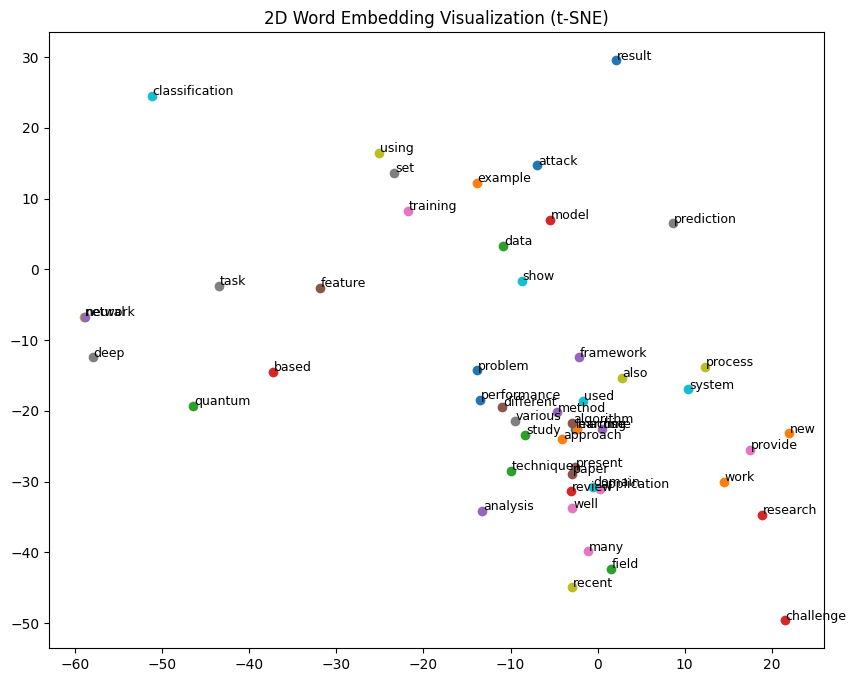


=== Cosine Similarity Results ===
   machine ↔ learning   = 0.6899
    neural ↔ network    = 0.6275
      data ↔ analysis   = 0.1755
     model ↔ performance = 0.1237
  research ↔ paper      = 0.1641


In [4]:

!pip install --quiet gensim==4.3.2 scikit-learn==1.2.2 matplotlib==3.7.1 nltk==3.8.1 pandas==2.0.3 numpy==1.24.4


import nltk, re, numpy as np, pandas as pd, matplotlib.pyplot as plt
from google.colab import drive
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity


drive.mount('/content/drive')

data_path = "/content/drive/MyDrive/papers_10000_cleaned.csv"
paper_data = pd.read_csv(data_path)
print(f"✅ Loaded {len(paper_data)} rows from {data_path}")


nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)

def clean_and_tokenize(txt):
    txt = str(txt).lower()
    txt = re.sub(r"http\S+|www\S+", "", txt)
    txt = re.sub(r"[^a-z\s]", "", txt)
    tokens = nltk.word_tokenize(txt)
    return [w for w in tokens if len(w) > 2]


col_text = "clean_lemmatized" if "clean_lemmatized" in paper_data.columns else "text"
corpus_sents = paper_data[col_text].dropna().apply(clean_and_tokenize).tolist()

print("✅ Sample tokens:", corpus_sents[0][:10])


w2v_model = Word2Vec(
    sentences=corpus_sents,
    vector_size=300,
    window=5,
    min_count=2,
    sg=1,
    epochs=15
)
print("✅ Word2Vec training done. Vocabulary size:", len(w2v_model.wv.index_to_key))


term_list = list(w2v_model.wv.index_to_key)
term_vectors = np.array([w2v_model.wv[w] for w in term_list])


pca_model = PCA(n_components=min(50, len(term_list)))
pca_output = pca_model.fit_transform(term_vectors)

tsne_model = TSNE(n_components=2, random_state=42, perplexity=min(30, len(pca_output)-1))
tsne_output = tsne_model.fit_transform(pca_output)

plt.figure(figsize=(10, 8))
subset_terms = term_list[:50]
subset_vecs = tsne_output[:50]

for i, word in enumerate(subset_terms):
    plt.scatter(subset_vecs[i, 0], subset_vecs[i, 1])
    plt.text(subset_vecs[i, 0] + 0.1, subset_vecs[i, 1] + 0.1, word, fontsize=9)

plt.title("2D Word Embedding Visualization (t-SNE)")
plt.show()


def pairwise_similarity(word_a, word_b):
    if word_a in w2v_model.wv and word_b in w2v_model.wv:
        vec_a, vec_b = w2v_model.wv[word_a], w2v_model.wv[word_b]
        return float(cosine_similarity([vec_a], [vec_b])[0][0])
    else:
        return None

word_pairs = [
    ("machine", "learning"),
    ("neural", "network"),
    ("data", "analysis"),
    ("model", "performance"),
    ("research", "paper")
]

print("\n=== Cosine Similarity Results ===")
for a, b in word_pairs:
    score = pairwise_similarity(a, b)
    if score is not None:
        print(f"{a:>10s} ↔ {b:<10s} = {score:.4f}")
    else:
        print(f"{a:>10s} ↔ {b:<10s} = ❌ not in vocab")


## Question 4 (20 Points)

**Create your own training and evaluation dataset for an NLP task.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.




1.   Which NLP Task you would like perform on your selected dataset
(NER, Summarization, Sentiment Analysis, Text classficication)
2.  Explain your labeling Schema you have used and mention those labels

3.  You can take AI assistance for labeling the data only.



1. Selected NLP Task:Sentiment Analysis / Text Classification

I choose to perform sentiment analysis for my NLP assignment because the dataset contains reviews of cosmetic items in which consumers express neutral opinions, complaints, or satisfaction.  The best way to train a text classification model that can understand consumer sentiment is to use sentiment analysis, which helps classify these evaluations according to their emotional tone or attitude.

2. Labeling Schema:

Each reviews in our cosmetic item dataset was labeled with one of three sentiment categories:
-Reviews that express satisfaction or gratitude for a product are called positive.e.g "This foundation is long lasting and blends flawlessly."
-Reviews showing dissatisfaction or disappointment are classified as negative. e.g "Using moisturizer made my skin oily and led to breakouts."
-Reviews that are unbiased, factual, and devoid of strong emotions are called neutral. e.g "The product is odorless and comes in a 30 ml bottle.

3. AI assistance was used to pre-label the reviews, and all labels were manually verified for accuracy. This schema ensures that each review can be clearly classified for sentiment analysis or text classification tasks.


The GitHub link of final csv file:
https://github.com/sthapa5496-ops/Samraggi/blob/main/Thapa_Samraggi_Assignment_3(excel).xlsx


# Mandatory Question

Provide your thoughts on the assignment by filling this survey link. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

I think the assignment was okay. It took me like 4-5 hours to do the assignment. The challenging part was using n-gram analysis and calculating probabilties. The aspect that i enjoyed was I learned visualize semantic correlations and develop a word embedding model